#KC_HOUSE_DATA ANALYSIS. 

##By Denis King'ara

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
house_df = pd.read_csv('kc_house_data.csv')

Checking for null values.

In [25]:
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Dealing with empty values.

In [45]:
house_df['waterfront'].fillna('NO', inplace=True);

In [40]:
house_df['view'].fillna('Unknown', inplace=True)

In [48]:
house_df['yr_renovated'] = house_df['yr_renovated'].fillna(0)
house_df['yr_renovated'] = house_df['yr_renovated'].astype('int')

Check if the empty values are filled.

In [49]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Check the data types

In [50]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [53]:
house_df.bathrooms = house_df.bathrooms.astype('int')

Check the data types.

In [55]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int64  
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##WHAT AFFECTS PRICE THE MOST.

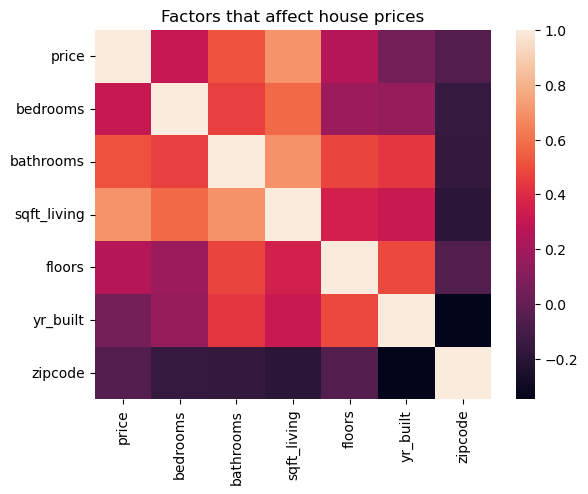

In [77]:
factors = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors','yr_built', 'zipcode']]
corr = factors.corr()
sns.heatmap(corr)
plt.title('Factors that affect house prices')
plt.show()

In [88]:
house_df_copy = house_df.copy()
house_df_renovated = house_df_copy[house_df_copy['yr_renovated'] != 0]
house_df_unrenovated = house_df_copy[house_df_copy['yr_renovated'] == 0]

#Does renovation have an impact on house prices?

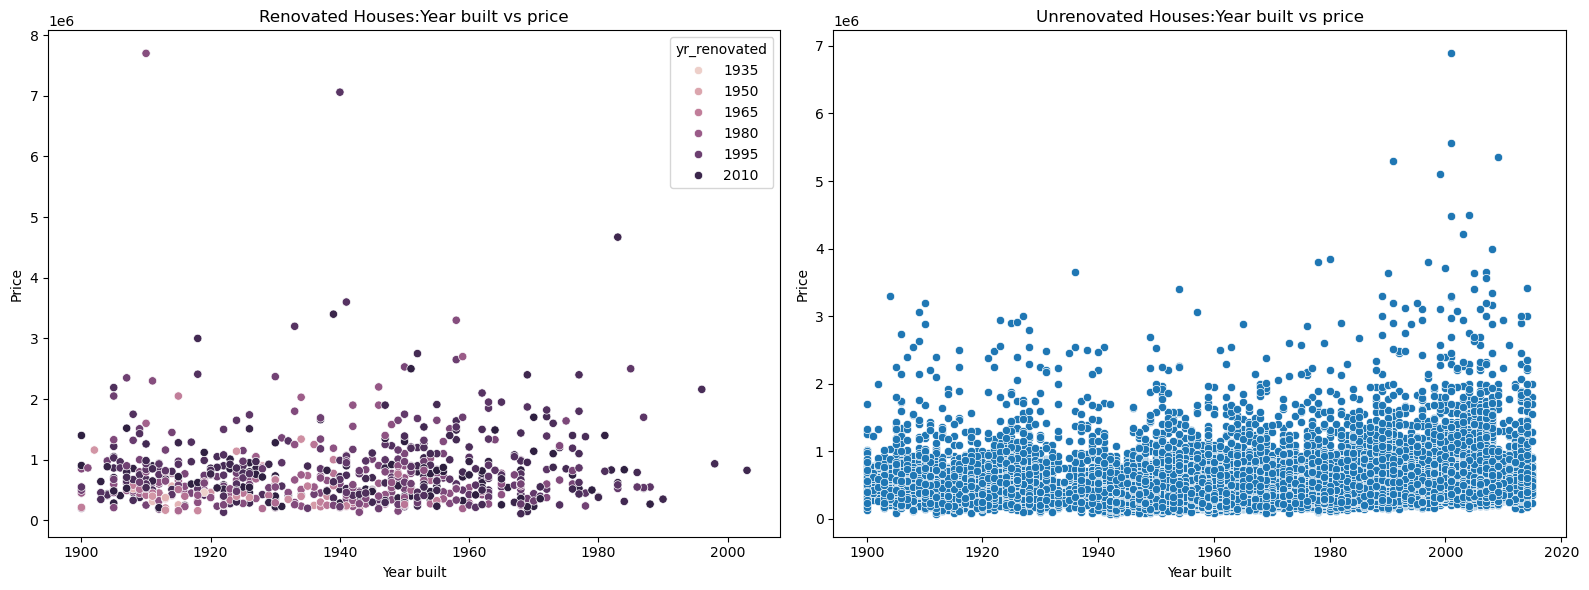

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#Plot showing the renovated houses vs price.
sns.scatterplot(y='price', x='yr_built', data=house_df_renovated, hue='yr_renovated', ax=axes[0])
axes[0].set_title('Renovated Houses:Year built vs price')
axes[0].set_ylabel('Price')
axes[0].set_xlabel('Year built')

#Plot showing the unrenovated houses vs price.
sns.scatterplot(y='price', x='yr_built', data=house_df_unrenovated, ax=axes[1])
axes[1].set_title('Unrenovated Houses:Year built vs price')
axes[1].set_ylabel('Price')
axes[1].set_xlabel('Year built')

plt.tight_layout()
plt.show()

##Which ares have the most expensive houses?

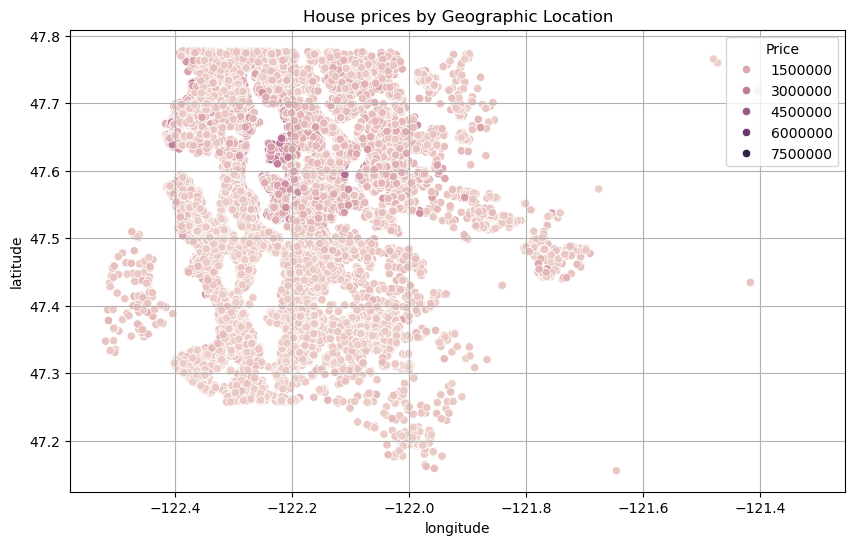

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', data=house_df, hue='price')
plt.title('House prices by Geographic Location')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(title='Price', loc='upper right')
plt.grid(True)
plt.show()